# The Shopping Trends

Importing Libraries

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from joblib import dump, load
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

Loading the Dataset

In [2]:
df = pd.read_csv("shopping_trends_updated.csv")
df.sample(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3574,3575,29,Female,Socks,Clothing,70,New York,M,Cyan,Fall,4.90,No,Express,No,No,39,Bank Transfer,Quarterly
2403,2404,64,Male,Shorts,Clothing,22,Missouri,M,Magenta,Fall,4.40,No,Standard,No,No,40,Debit Card,Weekly
2955,2956,42,Female,Boots,Footwear,67,Vermont,M,Silver,Winter,2.60,No,Free Shipping,No,No,46,Credit Card,Annually
681,682,30,Male,Shirt,Clothing,59,Louisiana,XL,Purple,Winter,3.80,Yes,2-Day Shipping,Yes,Yes,24,Credit Card,Every 3 Months
3127,3128,55,Female,Gloves,Accessories,94,Louisiana,M,Beige,Winter,3.40,No,Free Shipping,No,No,43,Credit Card,Every 3 Months
344,345,24,Male,Skirt,Clothing,71,Virginia,M,Charcoal,Winter,4.00,Yes,Standard,Yes,Yes,46,Debit Card,Monthly
1762,1763,36,Male,Sandals,Footwear,42,Idaho,M,Brown,Summer,3.10,No,Express,No,No,41,Bank Transfer,Fortnightly
2929,2930,31,Female,Socks,Clothing,53,Maine,XL,White,Winter,4.50,No,Next Day Air,No,No,42,Venmo,Fortnightly
2090,2091,51,Male,Socks,Clothing,71,Massachusetts,S,Teal,Winter,3.40,No,Free Shipping,No,No,21,Debit Card,Monthly
691,692,60,Male,Backpack,Accessories,21,Massachusetts,L,Silver,Summer,2.90,Yes,Standard,Yes,Yes,37,PayPal,Bi-Weekly


**Dataset Description**

**Customer ID** - Unique identifier for each customer

**Age** - Age of the customer

**Gender** - Gender of the customer (Male/Female)

**Item Purchased** - The item purchased by the customer

**Category** - Category of the item purchased

**Purchase Amount (USD)** - The amount of the purchase in USD

**Location** - Location where the purchase was made

**Size** - Size of the purchased item

**Color** - Color of the purchased item

**Season** - Season during which the purchase was made

**Review Rating** - Rating given by the customer for the purchased item

**Subscription Status** - Indicates if the customer has a subscription (Yes/No)

**Shipping Type** - Type of shipping chosen by the customer

**Discount Applied** - Indicates if a discount was applied to the purchase (Yes/No)

**Promo Code Used** - Indicates if a promo code was used for the purchase (Yes/No)

**Previous Purchases** - Number of previous purchases made by the customer

**Payment Method** - Customer's most preferred payment method

Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)

# EDA

Checking The Shape

In [ ]:
df.shape

(3900, 18)

Checking The Number of Columns

In [ ]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

Information About The Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,"3,900.00","3,900.00","3,900.00","3,900.00","3,900.00"
mean,"1,950.50",44.07,59.76,3.75,25.35
std,"1,125.98",15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,"1,950.50",44.00,60.00,3.70,25.00
75%,"2,925.25",57.00,81.00,4.40,38.00
max,"3,900.00",70.00,100.00,5.00,50.00


- The first observation I would like to make is about age, considering its mean and standard deviation. The standard deviation is 34% of the mean.

- Regarding the 'Purchase Amount,' the percentage is 39% of the mean.

- The fact that the mean and median have close values indicates data skewness, suggesting that it is not heavily influenced by very low or very high values. This suggests a normal distribution, given that the mean and median are close, indicating symmetry in the data and a lack of significant skewness influenced by extreme values.

Checking Null Values

In [ ]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

Checking Duplicate Values

In [ ]:
df.duplicated().sum()

0

## General Visualization

### The Gender

In [ ]:
df["Gender"].value_counts()

Male      2652
Female    1248
Name: Gender, dtype: int64

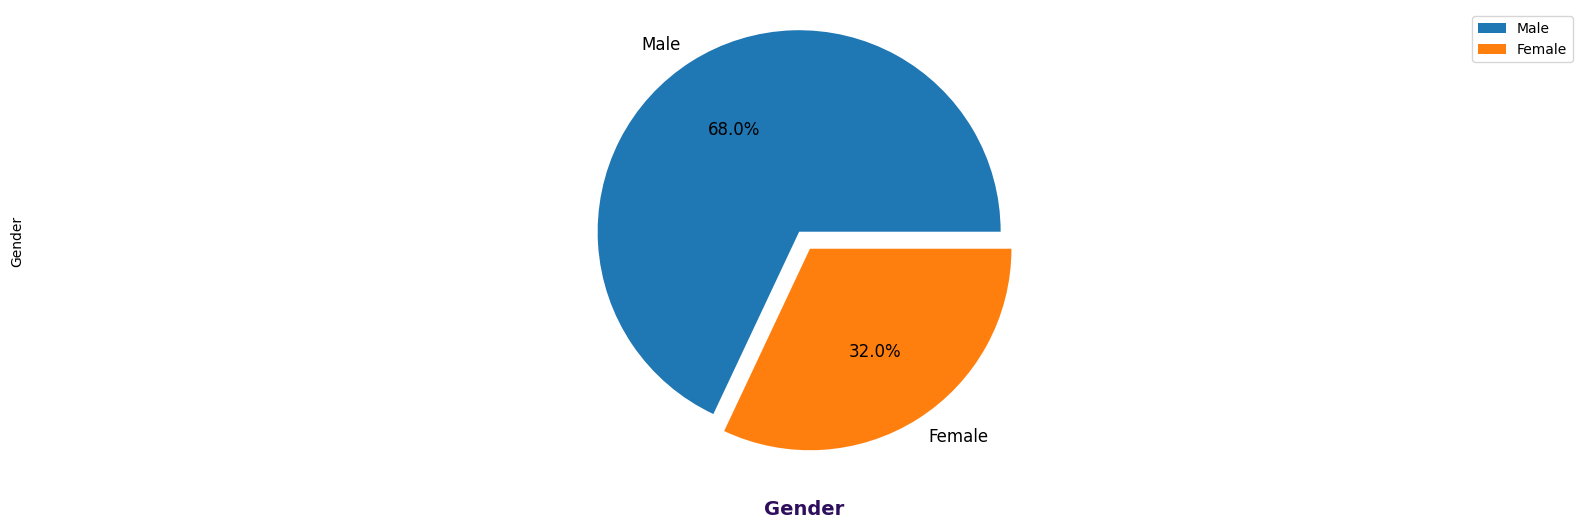

In [ ]:
plt.figure(figsize = (20, 6))

counts = df["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index)
plt.show()

### The Age Distribution

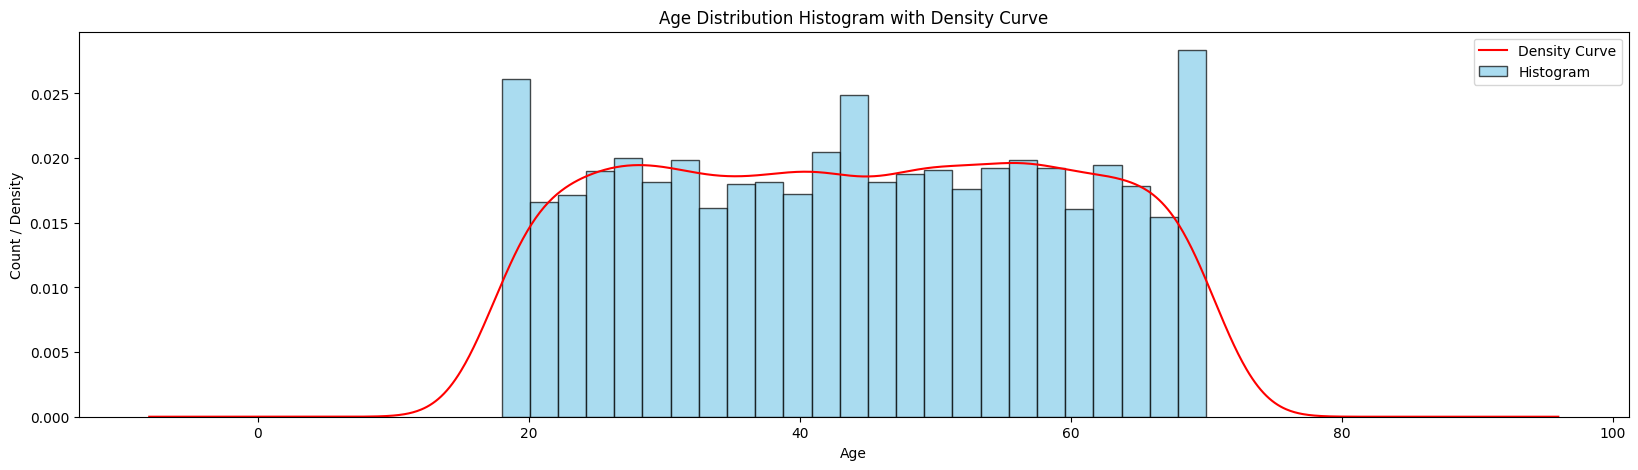

In [ ]:
fig, ax = plt.subplots(figsize = (20, 5))

ax.hist(df['Age'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

### The Category

In [ ]:
df["Category"].value_counts()

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

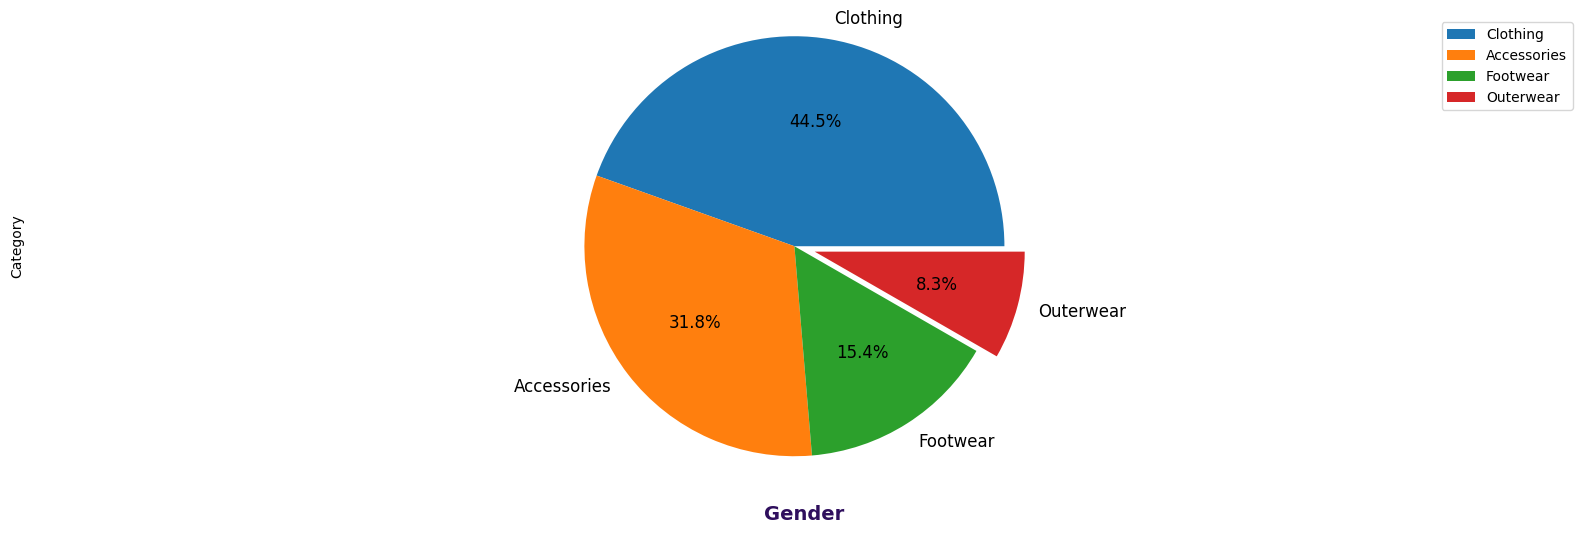

In [ ]:
plt.figure(figsize = (20, 6))

counts = df["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index)
plt.show()

### The Item Purchased

In [ ]:
df["Item Purchased"].value_counts()

Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

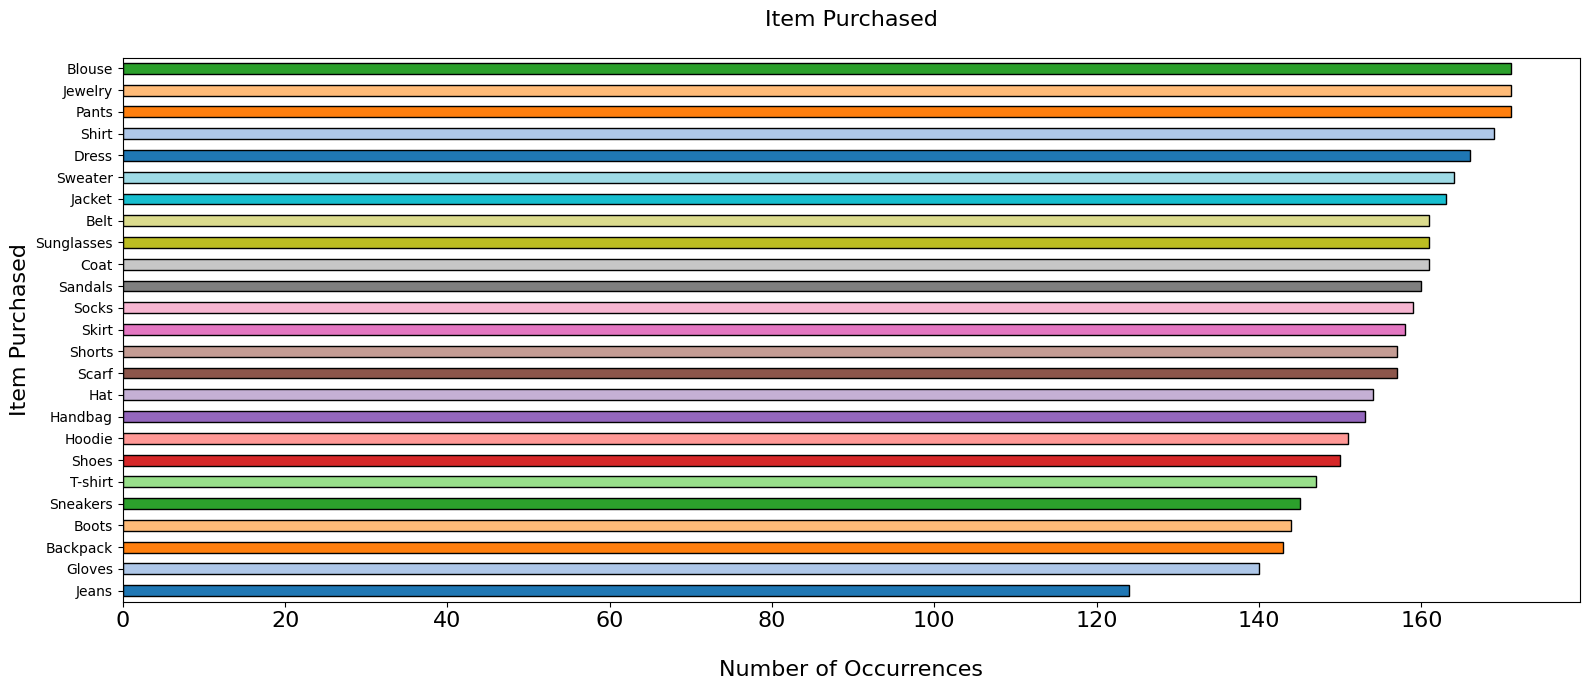

In [ ]:
plt.figure(figsize = (16, 7))
df["Item Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Item Purchased', fontsize = 16)
plt.xlabel('\nNumber of Occurrences', fontsize = 16)
plt.title('Item Purchased\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

### The Seasons

In [ ]:
df["Season"].value_counts()

Spring    999
Fall      975
Winter    971
Summer    955
Name: Season, dtype: int64

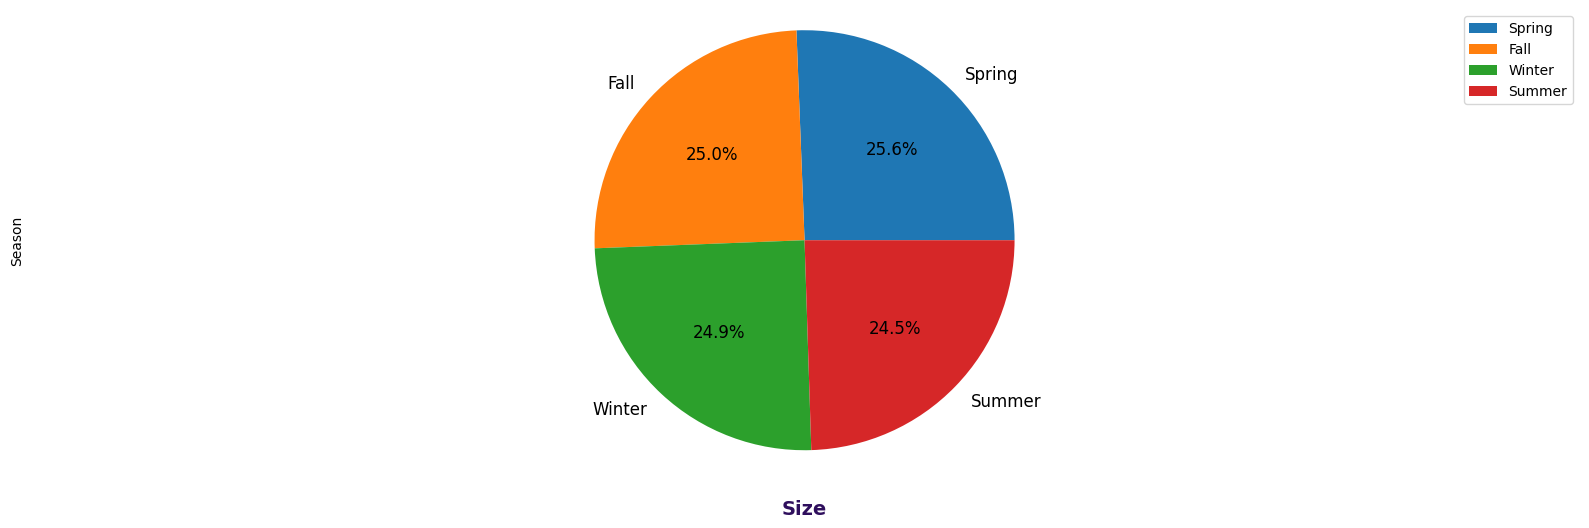

In [ ]:
plt.figure(figsize = (20, 6))

counts = df["Season"].value_counts()
explode = (0, 0, 0, 0)

counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

### The Payment Method

In [ ]:
df["Payment Method"].value_counts()

PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: Payment Method, dtype: int64

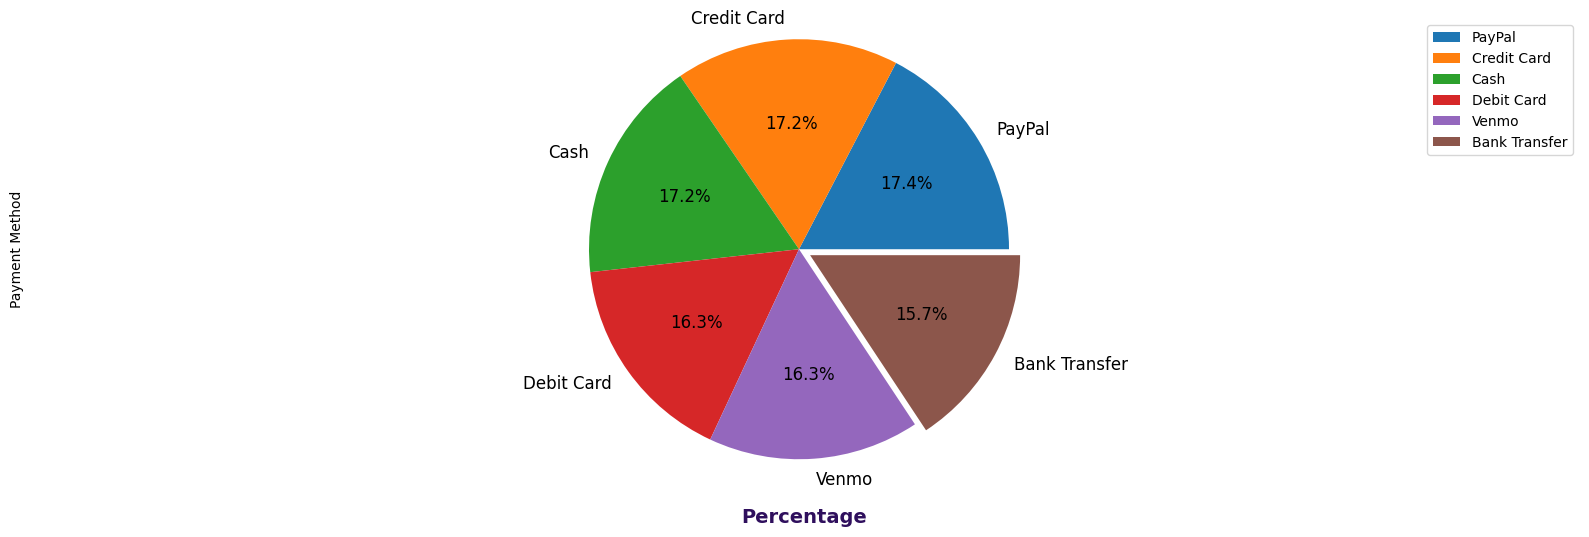

In [ ]:
plt.figure(figsize = (20, 6))

counts = df["Payment Method"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Percentage', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

### The Frequency of Purchases

In [ ]:
df["Frequency of Purchases"].value_counts()

Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: Frequency of Purchases, dtype: int64

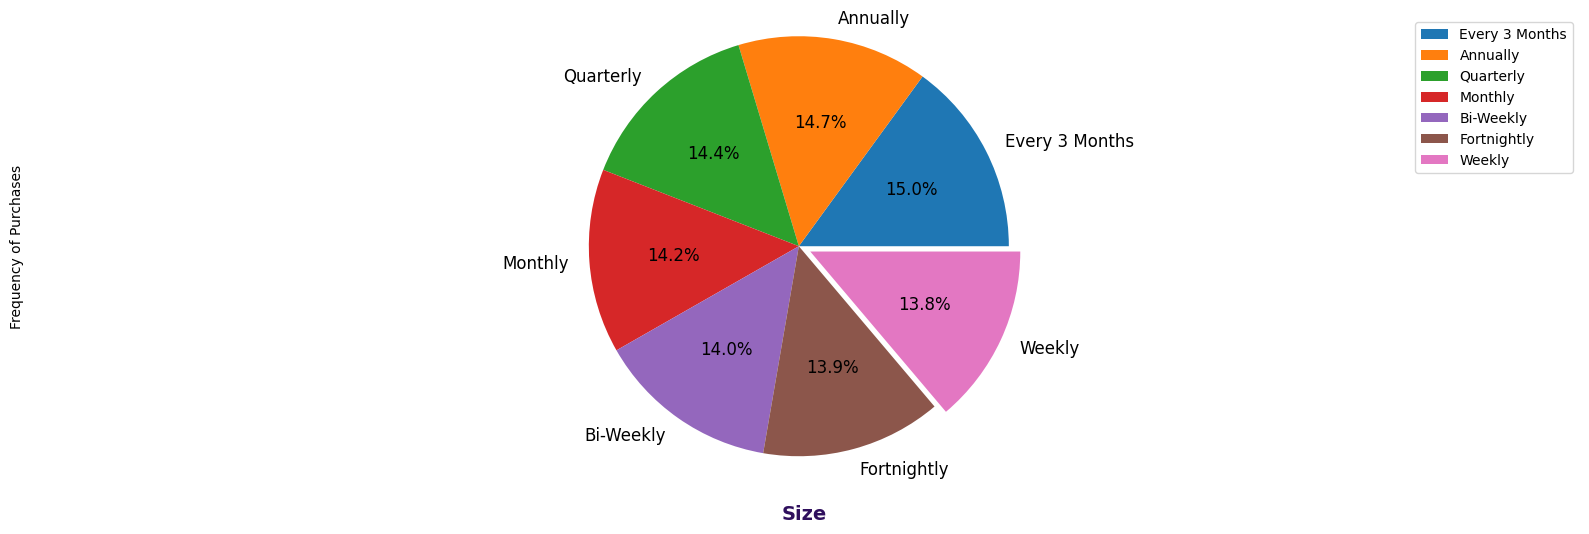

In [ ]:
plt.figure(figsize = (20, 6))

counts = df["Frequency of Purchases"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

### Histogram of Age Distribution

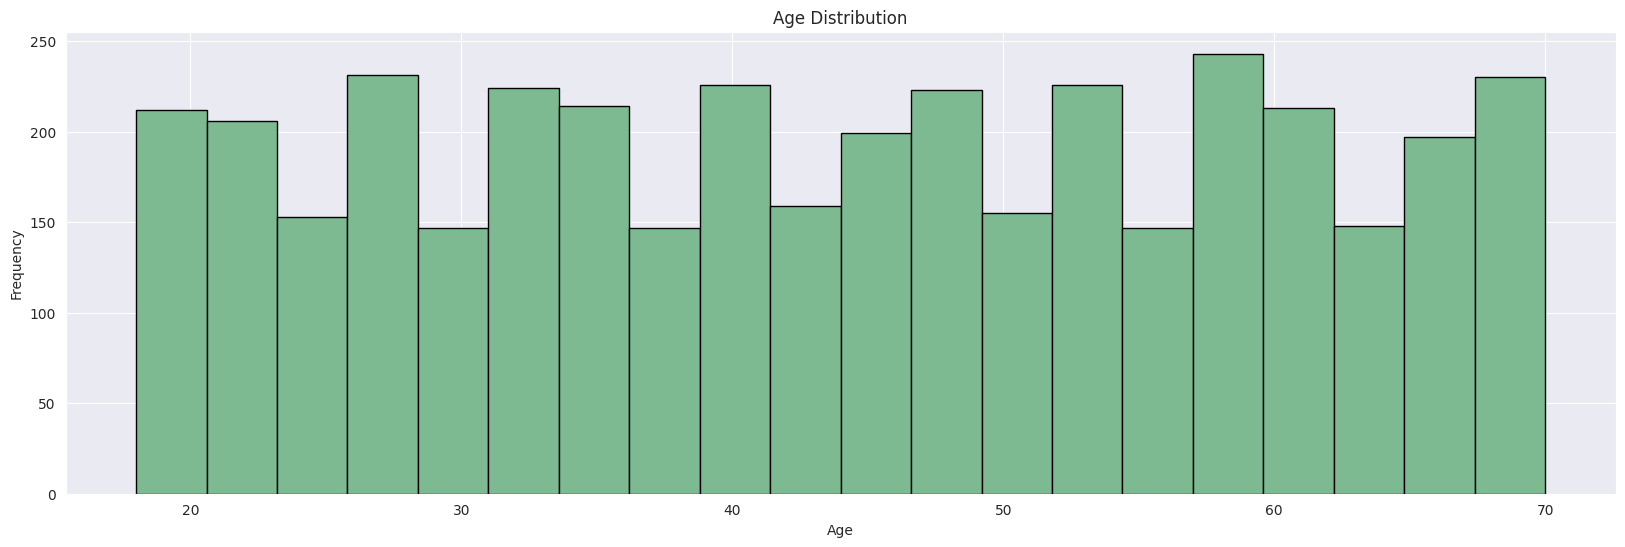

In [ ]:
plt.figure(figsize = (20, 6))
plt.hist(df['Age'], bins = 20, edgecolor = 'k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Area Plot of Total Purchase Amount by Category

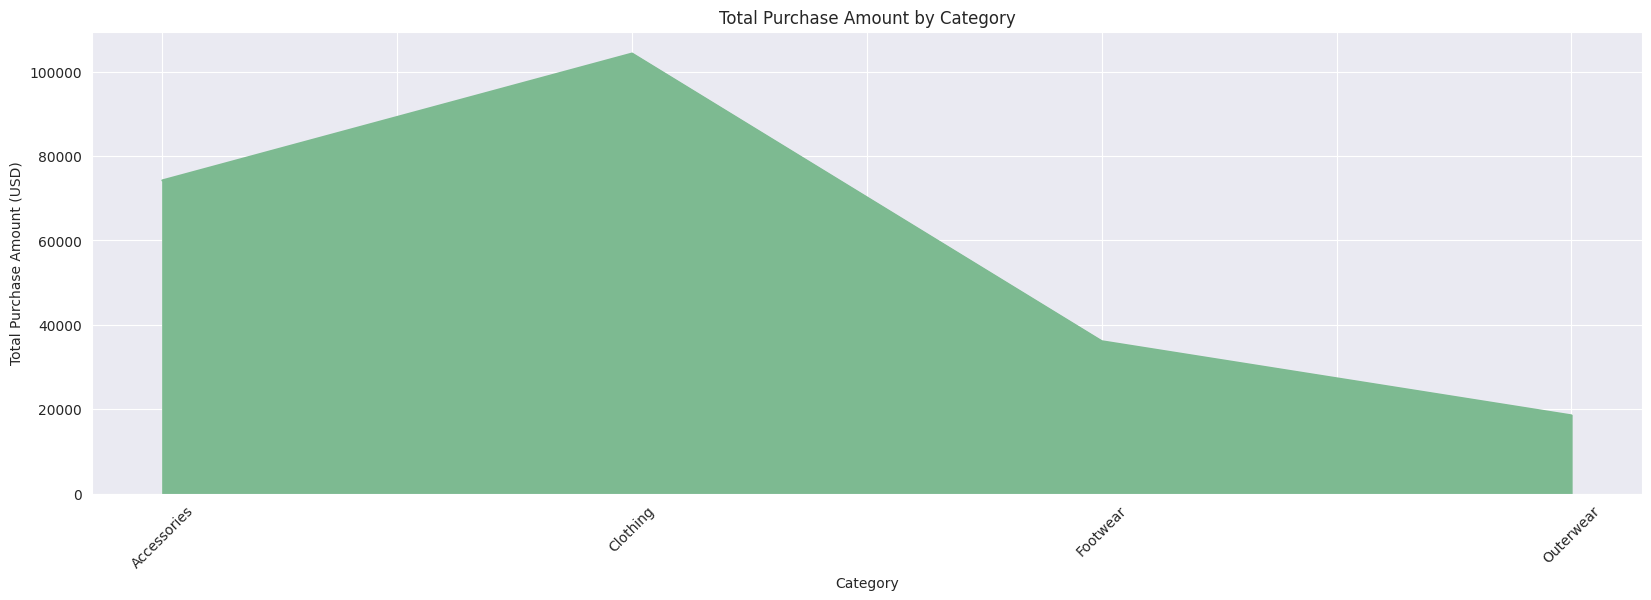

In [ ]:
plt.figure(figsize=(20, 6))
category_purchase_total = df.groupby('Category')['Purchase Amount (USD)'].sum()

category_purchase_total.plot(kind='area')
plt.title('Total Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

### KDE plot for Purchase Amount by Season

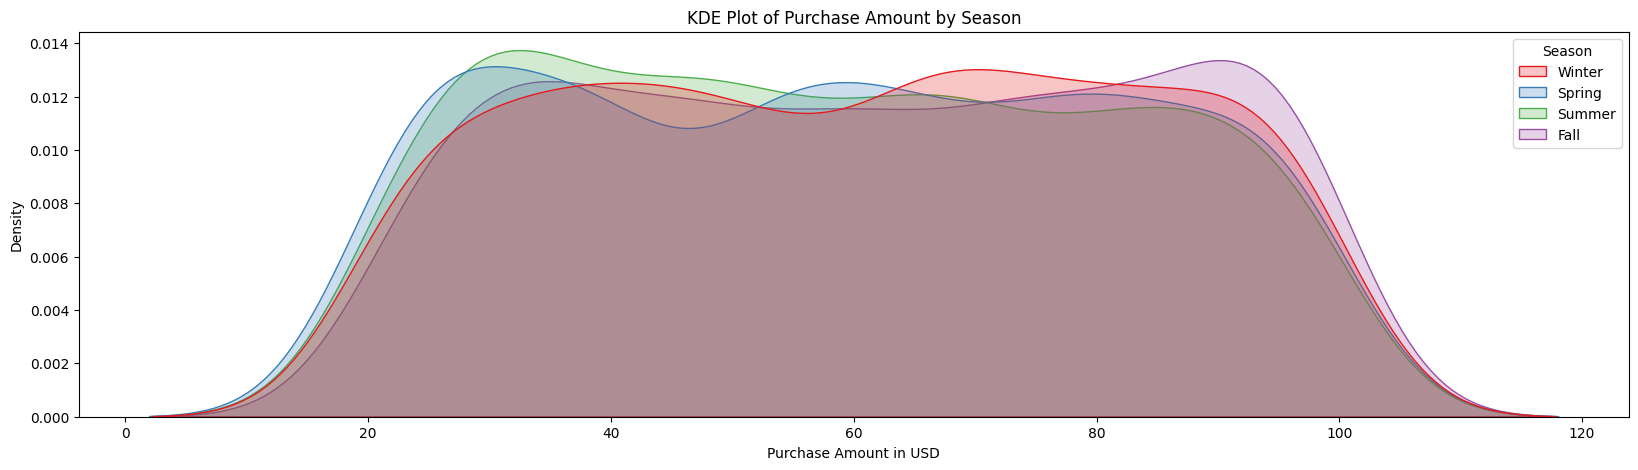

In [ ]:
plt.figure(figsize=(20, 5))
sns.kdeplot(data = df, x = 'Purchase Amount (USD)', hue = 'Season', common_norm = False, fill = True, palette = 'Set1')
plt.title('KDE Plot of Purchase Amount by Season')
plt.xlabel('Purchase Amount in USD')
plt.show()

### KDE Plot of Review Rating by Gender

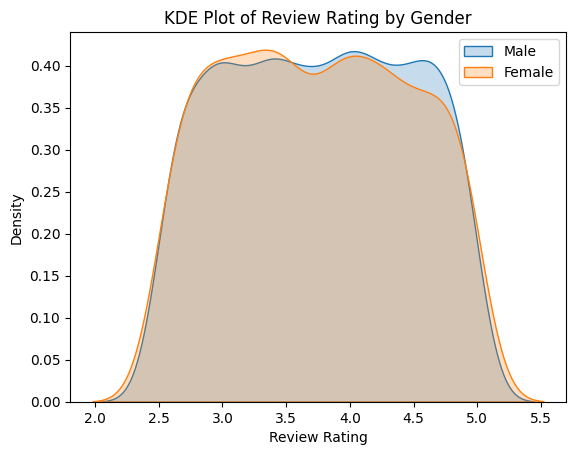

In [ ]:
sns.kdeplot(df[df['Gender'] == 'Male']['Review Rating'], label='Male', shade=True)
sns.kdeplot(df[df['Gender'] == 'Female']['Review Rating'], label='Female', shade=True)
plt.title('KDE Plot of Review Rating by Gender')
plt.xlabel('Review Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

# Justification and Data Analysis

Outliers

In [ ]:
iqr = {
    "Age": 57 - 31,
    "Purchase": 81 - 39,
    "Review Rating": 4.4 - 3.1,
    "Previous Purchase": 38 - 13
}

# Convert the dictionary to a DataFrame
iqr_df = pd.DataFrame(iqr, index=["IQR"])

iqr_df

,Age,Purchase,Review Rating,Previous Purchase
IQR,26,42,1.30,25


<Figure size 1000x600 with 0 Axes>

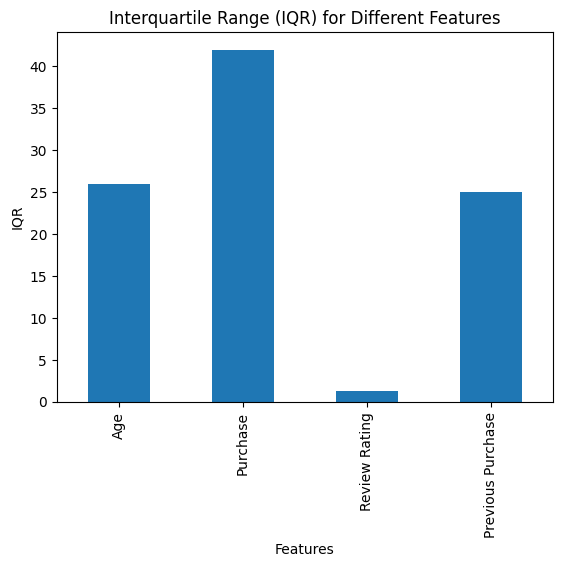

In [ ]:
# Visualize the IQR values
plt.figure(figsize=(10, 6))
iqr_df.T.plot(kind='bar', legend=False)
plt.title('Interquartile Range (IQR) for Different Features')
plt.xlabel('Features')
plt.ylabel('IQR')
plt.show()

The IQR (Interquartile Range) is more robust concerning outliers, and when dealing with a dataset that contains many outliers, it is effective to use the IQR.

In [ ]:
pd.DataFrame(df.mode()).transpose()

,0,1,2,3,4,5,6,7,8,9,...,3890,3891,3892,3893,3894,3895,3896,3897,3898,3899
Customer ID,1,2,3,4,5,6,7,8,9,10,...,3891,3892,3893,3894,3895,3896,3897,3898,3899,3900
Age,69.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Purchased,Blouse,Jewelry,Pants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,Clothing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase Amount (USD),32.00,36.00,94.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,Montana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,Olive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Use a other with boxplot is there any better

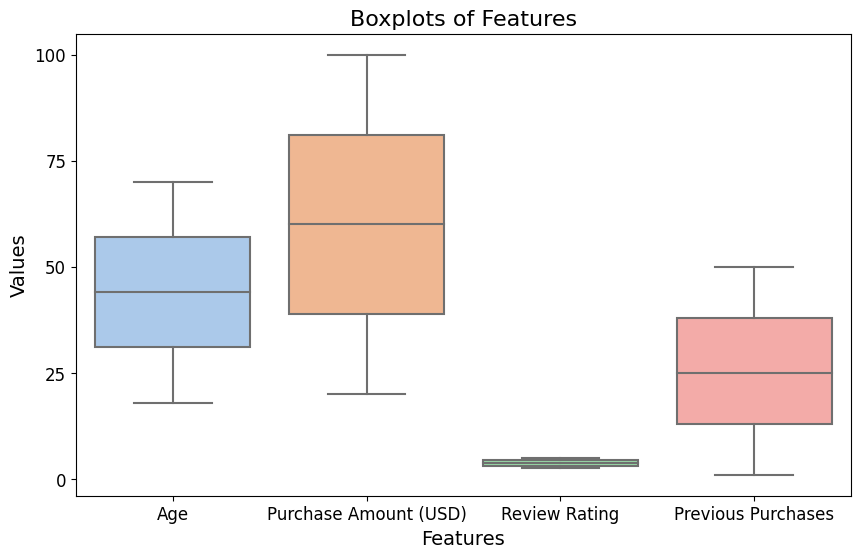

In [ ]:
features_to_visualize = df.drop(columns=["Customer ID","Cluster"])

# Visualizing outliers using side-by-side boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=features_to_visualize, palette='pastel')
plt.title('Boxplots of Features', fontsize=16)
plt.ylabel('Values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.yticks(range(0, 125, 25))
plt.tick_params(axis='both', labelsize=12)
plt.show()

The mode doesn't convey much information.

Dealing with a potential regression problem, it is necessary to use some basic plots, including boxplot, regplot, and scatterplot. It's also possible to use others such as the heat map to examine the relationship between variables.

## Correlation of The Data

<Axes: >

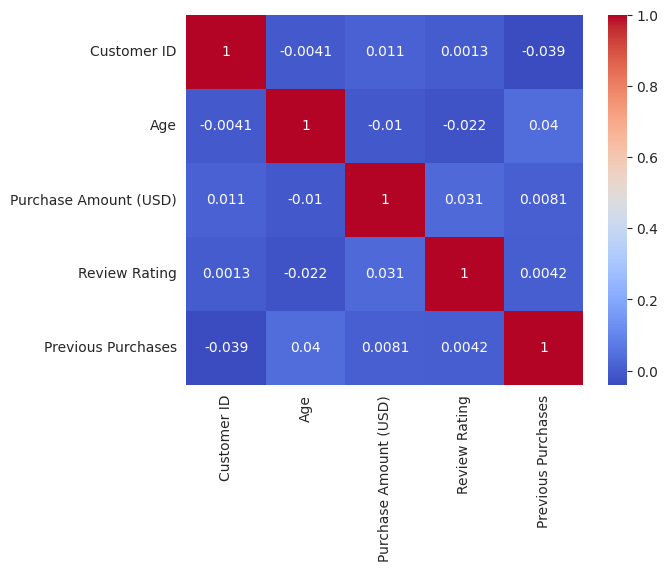

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

At a high level, it doesn't seem to be the distribution where regression would benefit. becasue of there is no high correlation to its other.

We conclude that a simple regression analysis may not be ideal for this dataset.

## Visualizations Age and Features

Categorical Specification

In [ ]:
def grouping_columns_by_dtype(df):
    # Membuat dictionary untuk menyimpan grup kolom berdasarkan tipe data
    grouped_columns = {}

    # Iterasi melalui setiap tipe data
    for x in df.dtypes.unique():
        # Memilih kolom dengan tipe data tertentu
        columns_of_dtype = df.select_dtypes(include=[x]).columns.tolist()

        # Menambahkan kolom-kolom tersebut ke dalam dictionary
        grouped_columns[str(x)] = columns_of_dtype

    return grouped_columns

In [ ]:
columns = grouping_columns_by_dtype(df)

for x, col in columns.items():
    print(f"{x} columns:")
    print(col, '\n')

int64 columns:
['Customer ID', 'Age', 'Purchase Amount (USD)', 'Previous Purchases'] 

object columns:
['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases'] 

float64 columns:
['Review Rating'] 



In [ ]:
# separating each data types into variable
object_columns = columns['object']
numerical_columns = columns['int64'] + columns['float64']

In [ ]:
numerical_columns = df.loc[:, ["Age", "Previous Purchases", "Review Rating", "Purchase Amount (USD)"]]
numerical_columns.groupby("Age").mean().sort_values(by="Age", ascending=True).sample(10)

,Previous Purchases,Review Rating,Purchase Amount (USD)
Age,,,
57,28.67,3.73,59.77
62,25.24,3.85,57.94
37,25.81,3.72,61.52
63,23.84,3.71,60.25
19,24.48,3.82,61.00
21,23.91,3.82,64.10
66,26.72,3.62,57.25
49,26.63,3.71,66.10
45,21.39,3.63,56.74


In [ ]:
bins = [18, 50, 70]
labels = ['adult', 'elderly']

numerical_columns['Age Range'] = pd.cut(numerical_columns['Age'], bins=bins, labels=labels, right=False)
numerical_columns_group = numerical_columns.drop("Age", axis=1).groupby('Age Range').mean()
np.round(numerical_columns_group, 2)

,Previous Purchases,Review Rating,Purchase Amount (USD)
Age Range,,,
adult,24.83,3.76,59.66
elderly,26.21,3.74,60.05


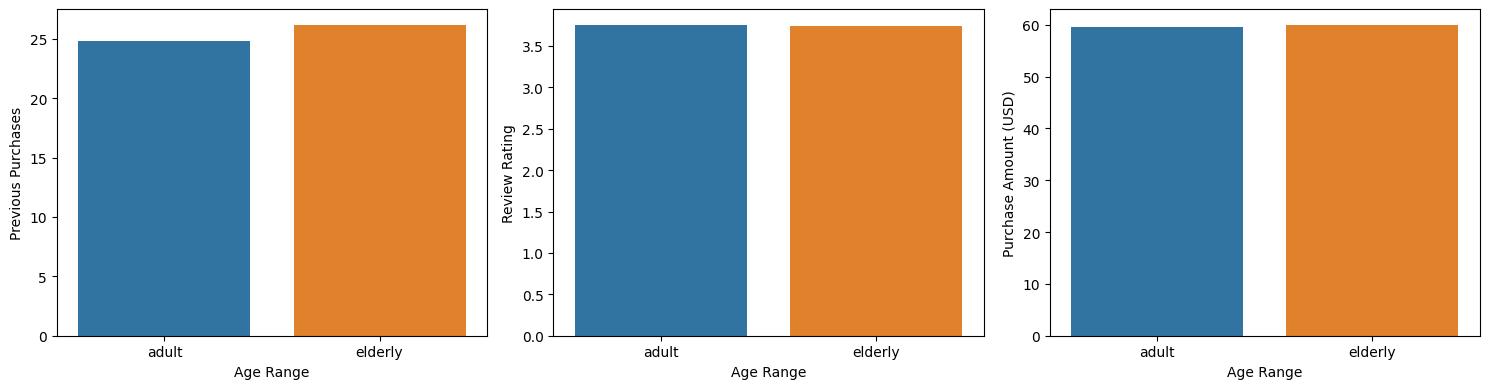

In [ ]:
plt.figure(figsize=(15,4))

plt.subplot(1, 3, 1)
sns.barplot(numerical_columns_group, x=numerical_columns_group.index, y="Previous Purchases")

plt.subplot(1, 3, 2)
sns.barplot(numerical_columns_group, x=numerical_columns_group.index, y="Review Rating")

plt.subplot(1, 3, 3)
sns.barplot(numerical_columns_group, x=numerical_columns_group.index, y="Purchase Amount (USD)")

plt.tight_layout()
plt.show()

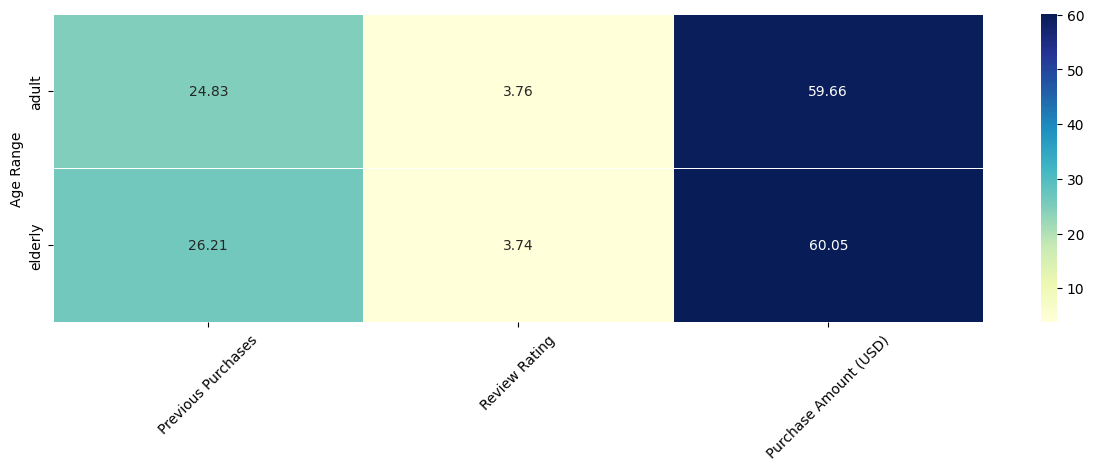

In [ ]:
plt.figure(figsize=(15,4))

sns.heatmap(data=numerical_columns_group, annot=True, cmap='YlGnBu', fmt='.2f', lw=0.5)
plt.xticks(rotation=45)
plt.show()

In [ ]:
categorical_data = df.loc[:, ["Size", "Color", "Season", "Category", "Gender", "Item Purchased", "Purchase Amount (USD)", "Age"]]
#categorical_data

bins = [18, 50, 70]
labels = ['adult', 'elderly']

categorical_data['Age Range'] = pd.cut(numerical_columns['Age'], bins=bins, labels=labels, right=False)
categorical_data.head()

,Size,Color,Season,Category,Gender,Item Purchased,Purchase Amount (USD),Age,Age Range
0,L,Gray,Winter,Clothing,Male,Blouse,53,55,elderly
1,L,Maroon,Winter,Clothing,Male,Sweater,64,19,adult
2,S,Maroon,Spring,Clothing,Male,Jeans,73,50,elderly
3,M,Maroon,Spring,Footwear,Male,Sandals,90,21,adult
4,M,Turquoise,Spring,Clothing,Male,Blouse,49,45,adult


It was observed that individuals categorized as `elderly`, those aged over 50, spend more than the adult, although the difference is not significant.

#Machine Learning

The model that could be applied to this data structure is the KNN (K-Nearest Neighbors) model, given that it doesn't require a precisely strong relationship among its 'neighbors to Predict the Age.

The other model that we are using is the K-means Clustring to know the Costumer Segmentation to by Purchasing Behavior and Age Customer Clustering

##Predict Age

###Spilt Data

In [ ]:
X = df.drop("Age", axis=1)
y = df["Age"]

In [ ]:
X.head()

,Customer ID,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Cluster
0,1,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.10,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,0
1,2,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.10,Yes,Express,Yes,Yes,2,Cash,Fortnightly,1
2,3,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.10,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,1
3,4,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.50,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,1
4,5,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.70,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,0


### Categorical and Numerical

In [ ]:
numerical = X.drop(["Color",
                    "Size",
                    "Item Purchased",
                    "Season", "Category",
                    "Gender", "Payment Method",
                    "Frequency of Purchases", "Subscription Status",
                    "Location", "Promo Code Used", "Shipping Type",
                    "Discount Applied", "Customer ID"], axis=1)

In [ ]:
categorical = X.filter(["Color",
                    "Size",
                    "Item Purchased",
                    "Season", "Category",
                    "Gender", "Payment Method",
                    "Frequency of Purchases", "Subscription Status",
                    "Location", "Promo Code Used", "Shipping Type",
                    "Discount Applied"], axis=1)

In [ ]:
categorical = pd.get_dummies(categorical, drop_first=True)

In [ ]:
X = pd.concat([numerical, categorical], axis=1)
X.head()

,Purchase Amount (USD),Review Rating,Previous Purchases,Cluster,Color_Black,Color_Blue,Color_Brown,Color_Charcoal,Color_Cyan,Color_Gold,...,Location_West Virginia,Location_Wisconsin,Location_Wyoming,Promo Code Used_Yes,Shipping Type_Express,Shipping Type_Free Shipping,Shipping Type_Next Day Air,Shipping Type_Standard,Shipping Type_Store Pickup,Discount Applied_Yes
0,53,3.10,14,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1,64,3.10,2,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,73,3.10,23,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,90,3.50,49,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,49,2.70,31,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### KNN (K-Nearest Neighbors)

In [ ]:
# KNN_reg = KNeighborsRegressor()

pipe = Pipeline([

    ("scale", StandardScaler()),
    ("model",  KNeighborsRegressor())
])


pipe.fit(X_train, y_train)
predict = pipe.predict(X_test)

In [ ]:
dic_metrics = {

    "MAE":[mean_absolute_error(y_test, predict)],
    "MSE":[mean_squared_error(y_test, predict)],
    "RMSE":[np.sqrt(mean_squared_error(y_test, predict))],
    "MEAN AGE":[df["Age"].mean()]
}

np.round(pd.DataFrame(dic_metrics, index=["Metrics"]), 2)

,MAE,MSE,RMSE,MEAN AGE
Metrics,14.19,278.11,16.68,44.07


Residual

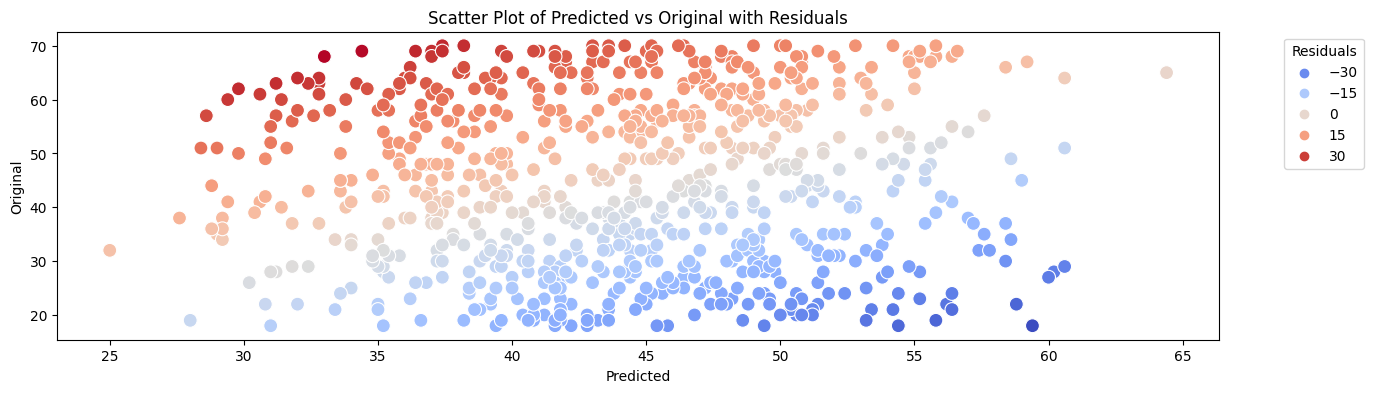

In [ ]:
test_residuals = y_test - predict

plt.figure(figsize=(15, 4))
sns.scatterplot(x=predict, y=y_test, hue=test_residuals, palette='coolwarm', s=100)

plt.xlabel("Predicted")
plt.ylabel("Original")
plt.title("Scatter Plot of Predicted vs Original with Residuals")
plt.legend(title="Residuals", bbox_to_anchor=(1.05, 1), loc='upper left')


## K-means Clustering

### Purchasing Behavior by Category

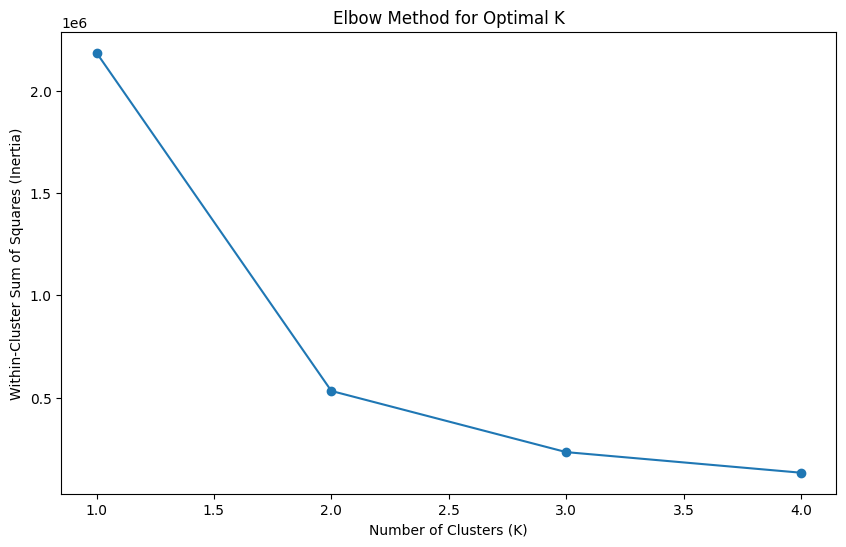

In [ ]:
# Pilih fitur yang relevan
selected_features_1 = df[['Purchase Amount (USD)']]

# Skalakan data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features_1 = scaler.fit_transform(selected_features_1)

# Eksperimen menggunakan Elbow Method
inertia = []
for k in range(1, 5):  # Coba jumlah cluster dari 1 hingga 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_features_1)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

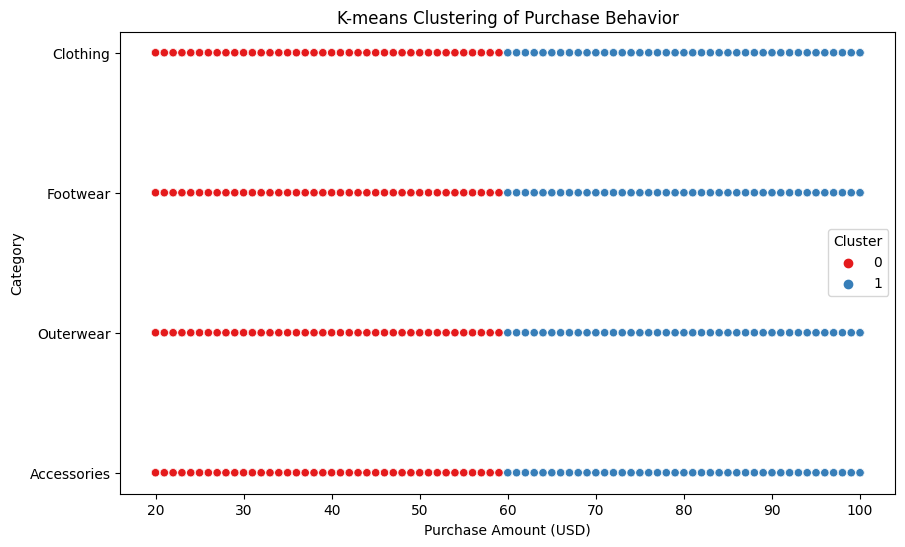

In [ ]:
# Pilih jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(selected_features_1)

# Tambahkan label cluster ke DataFrame
df['Cluster'] = clusters

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Purchase Amount (USD)', y='Category', hue='Cluster', data=df, palette='Set1')
plt.title('K-means Clustering of Purchase Behavior')
plt.show()

### Customer Clustering by Age and Purchase Amount (USD)

In [ ]:
selected_features_2 = df[['Age', 'Purchase Amount (USD)']]

# Skalakan data
scaler = StandardScaler()
scaled_features_2 = scaler.fit_transform(selected_features_2)

# Gunakan K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
cluster = df['Cluster'] = kmeans.fit_predict(selected_features_2)

# Analisis hasil clustering
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

         Customer ID   Age  Purchase Amount (USD)  Review Rating  \
Cluster                                                            
0           1,947.44 44.31                  39.03           3.72   
1           1,953.52 43.83                  80.23           3.78   

         Previous Purchases  
Cluster                      
0                     25.17  
1                     25.53  


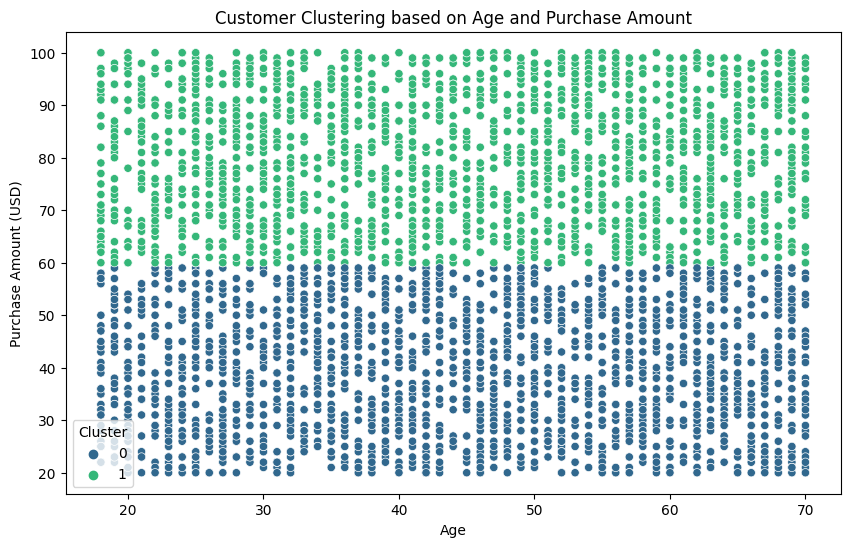

In [ ]:
# Visualisasi scatter plot untuk umur dan jumlah pembelian
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Clustering based on Age and Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Cluster')
plt.show()

The clustering is based on the purchase amount (USD), and Cluster 0 indicates that the purchase amount is under 55, while Cluster 1 represents amounts above 55.